In [1]:
import pandas as pd

# Load the Excel file to check sheet names
excel_file_path = 'WEO2023_Electricity_access_database.xlsx'
access_sheets = pd.ExcelFile(excel_file_path).sheet_names
access_sheets

['Africa', 'Developing Asia', 'Central and South America', 'Middle East']

In [2]:
# Correctly defining the dictionary for electricity access sheets
access_sheets = {
    'Africa': 'Africa', 
    'Developing Asia': 'Developing Asia', 
    'Central and South America': 'Central and South America', 
    'Middle East': 'Middle East'
}

# Re-load and clean electricity access data for all required regions
access_dfs_corrected = []
for region, sheet in access_sheets.items():
    df = pd.read_excel(excel_file_path, sheet_name=sheet)
    df.columns = ['Country', 'Access_2000', 'Access_2005', 'Access_2010', 'Access_2015', 'Access_2022', 'Urban_Access_2022', 'Rural_Access_2022', 'Population_without_access_2022_in_Million']
    df = df.drop([0, 1])  # Remove header rows which are typically descriptive rows in the dataset
    df.replace(['>', '<', '%'], '', regex=True, inplace=True)  # Clean data
    cols_to_convert_access = ['Access_2000', 'Access_2005', 'Access_2010', 'Access_2015', 'Access_2022', 'Urban_Access_2022', 'Rural_Access_2022', 'Population_without_access_2022_in_Million']
    df[cols_to_convert_access] = df[cols_to_convert_access].apply(pd.to_numeric, errors='coerce')
    df['Continent'] = region
    access_dfs_corrected.append(df)

# Combine all corrected access dataframes
combined_access_df_corrected = pd.concat(access_dfs_corrected, ignore_index=True)

# Verify the final DataFrame
combined_access_df_corrected.head()
# Function to convert values to consistent percentage form
def convert_to_percentage(x):
    if x <= 1:  # Assuming that values <=1 are meant to be in fraction form and need conversion
        return x * 100
    return x

# Columns to convert
access_columns = ['Access_2000', 'Access_2005', 'Access_2010', 'Access_2015', 'Access_2022', 'Urban_Access_2022', 'Rural_Access_2022']

# Apply the conversion to each relevant column
for col in access_columns:
    combined_access_df_corrected[col] = combined_access_df_corrected[col].apply(convert_to_percentage)

# Recheck the data to ensure correction was applied
combined_access_df_corrected.head()



,Country,Access_2000,Access_2005,Access_2010,Access_2015,Access_2022,Urban_Access_2022,Rural_Access_2022,Population_without_access_2022_in_Million,Continent
0,Algeria,98.00000,98.34000,99.000000,99.0,99.0,99.0,96.617828,1,Africa
1,Egypt,93.80000,98.32000,99.000000,99.0,99.0,99.0,99.000000,1,Africa
2,Libya,99.00000,99.00000,99.000000,99.0,99.0,99.0,99.000000,1,Africa
3,Morocco,71.56083,90.37958,98.656576,99.0,99.0,99.0,99.000000,1,Africa
4,Tunisia,94.60000,99.00000,99.000000,99.0,99.0,99.0,99.000000,1,Africa


In [3]:
import pandas as pd

# Load the Excel file to check sheet names
new_excel_file_path = 'WorldEnergyInvestment2023_DataFile.xlsx'
investment_sheets  = pd.ExcelFile(excel_file_path).sheet_names
investment_sheets 

['Africa', 'Developing Asia', 'Central and South America', 'Middle East']

In [4]:
# Correctly defining the dictionary for energy investment sheets
investment_sheets = {
    'World': 'World',
    'China': 'China',
    'North America': 'North America',
    'Central and South America': 'Central and South America',
    'Europe': 'Europe',
    'Africa': 'Africa',
    'Middle East': 'Middle East',
    'Eurasia': 'Eurasia',
    'Asia Pacific': 'Asia Pacific'
}

# Re-load and clean energy investment data for all required regions
investment_dfs_corrected = []
for region, sheet in investment_sheets.items():
    df = pd.read_excel(new_excel_file_path, sheet_name=sheet)
    df.columns = ['Category', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
    df['Continent'] = region
    investment_dfs_corrected.append(df)

# Combine all corrected investment dataframes
combined_investment_df_corrected = pd.concat(investment_dfs_corrected, ignore_index=True)

# Verify the final DataFrame
combined_investment_df_corrected.head()

,Category,2015,2016,2017,2018,2019,2020,2021,2022,2023,Continent
0,Total (billion $2022),2392.0,2237.0,2243.0,2245.0,2291.0,2098.0,2322.0,2619.0,2791.0,World
1,of which: Clean energy,1074.0,1132.0,1129.0,1137.0,1225.0,1259.0,1408.0,1617.0,1740.0,World
2,Supply (by type),2013.0,1826.0,1840.0,1850.0,1865.0,1683.0,1804.0,2019.0,2166.0,World
3,Fossil fuels without CCUS,1319.0,1105.0,1115.0,1109.0,1066.0,839.0,915.0,1003.0,1051.0,World
4,Renewables,337.0,346.0,357.0,383.0,458.0,500.0,525.0,608.0,672.0,World


In [5]:
# Export the combined access and investment data to an Excel file with separate sheets
final_export_path = 'Comprehensive_Combined_Data.xlsx'
with pd.ExcelWriter(final_export_path) as writer:
    combined_access_df_corrected.to_excel(writer, sheet_name='Electricity_Access', index=False)
    combined_investment_df_corrected.to_excel(writer, sheet_name='Energy_Investment', index=False)

final_export_path

'Comprehensive_Combined_Data.xlsx'

In [7]:
import pandas as pd

# Load the population data from the CSV file
population_data_path = 'Population CSV.csv'
population_data = pd.read_csv(population_data_path)

# Display the first few rows of the population data to understand its structure
population_data.head()

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Last Updated Date,3/28/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0
4,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,NaN


In [8]:
# Adjusting the data import to skip the initial rows and setting appropriate column names
population_data = pd.read_csv(population_data_path, skiprows=4)

# Displaying the first few rows after adjustment to confirm proper format
population_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,NaN


In [10]:
# Load the Excel data from the file
comprehensive_data_path = 'Comprehensive_Combined_Data.xlsx'
comprehensive_data = pd.read_excel(comprehensive_data_path)

# Display the first few rows of the comprehensive data to understand its structure
comprehensive_data.head()

,Country,Access_2000,Access_2005,Access_2010,Access_2015,Access_2022,Urban_Access_2022,Rural_Access_2022,Population_without_access_2022_in_Million,Continent
0,Algeria,98.00000,98.34000,99.000000,99.0,99.0,99.0,96.617828,1,Africa
1,Egypt,93.80000,98.32000,99.000000,99.0,99.0,99.0,99.000000,1,Africa
2,Libya,99.00000,99.00000,99.000000,99.0,99.0,99.0,99.000000,1,Africa
3,Morocco,71.56083,90.37958,98.656576,99.0,99.0,99.0,99.000000,1,Africa
4,Tunisia,94.60000,99.00000,99.000000,99.0,99.0,99.0,99.000000,1,Africa


In [11]:
# Extracting the country names and population for the year 2022 from the population dataset
population_2022 = population_data[['Country Name', '2022']].copy()

# Renaming columns for clarity
population_2022.rename(columns={'Country Name': 'Country', '2022': 'Population'}, inplace=True)

# Display the first few rows to confirm the extraction
population_2022.head()

,Country,Population
0,Aruba,106445.0
1,Africa Eastern and Southern,720859132.0
2,Afghanistan,41128771.0
3,Africa Western and Central,490330870.0
4,Angola,35588987.0


In [12]:
# List of unique country names from both datasets
population_countries = set(population_2022['Country'])
comprehensive_countries = set(comprehensive_data['Country'])

# Identifying non-matching country names
non_matching_from_population = population_countries - comprehensive_countries
non_matching_from_comprehensive = comprehensive_countries - population_countries

non_matching_from_population, non_matching_from_comprehensive

({'Afghanistan',
  'Africa Eastern and Southern',
  'Africa Western and Central',
  'Albania',
  'American Samoa',
  'Andorra',
  'Antigua and Barbuda',
  'Arab World',
  'Armenia',
  'Aruba',
  'Australia',
  'Austria',
  'Azerbaijan',
  'Bahamas, The',
  'Barbados',
  'Belarus',
  'Belgium',
  'Belize',
  'Bermuda',
  'Bhutan',
  'Bosnia and Herzegovina',
  'British Virgin Islands',
  'Brunei Darussalam',
  'Bulgaria',
  'Cabo Verde',
  'Canada',
  'Caribbean small states',
  'Cayman Islands',
  'Central Europe and the Baltics',
  'Channel Islands',
  'Chile',
  'Congo, Dem. Rep.',
  'Congo, Rep.',
  'Croatia',
  'Curacao',
  'Cyprus',
  'Czechia',
  'Denmark',
  'Dominica',
  'Early-demographic dividend',
  'East Asia & Pacific',
  'East Asia & Pacific (IDA & IBRD countries)',
  'East Asia & Pacific (excluding high income)',
  'Egypt, Arab Rep.',
  'Estonia',
  'Euro area',
  'Europe & Central Asia',
  'Europe & Central Asia (IDA & IBRD countries)',
  'Europe & Central Asia (excludi

In [13]:
# Removing aggregated and regional entries from the population dataset
countries_to_remove = [name for name in non_matching_from_population if "income" in name or "Europe" in name or 
                      "Africa" in name or "Asia" in name or "America" in name or "World" in name or 
                      "Euro area" in name or "OECD" in name or "Middle East" in name or "Sub-Saharan" in name or 
                      "Caribbean" in name or "Pacific" in name or "Central" in name or "East" in name or 
                      "West" in name or "North" in name or "South" in name or "Latin" in name or 
                      "small states" in name or "Not classified" in name or "demographic dividend" in name]

# Filter out these non-specific country entries
population_2022_clean = population_2022[~population_2022['Country'].isin(countries_to_remove)]

# Remaining non-matching country name adjustments based on identified mismatches
country_name_corrections = {
    'Egypt, Arab Rep.': 'Egypt',
    'Venezuela, RB': 'Venezuela',
    'Yemen, Rep.': 'Yemen',
    'Congo, Dem. Rep.': 'Democratic Republic of the Congo',
    'Congo, Rep.': 'Congo',
    'Gambia, The': 'Gambia',
    'Iran, Islamic Rep.': 'Iran',
    'Korea, Rep.': 'South Korea',
    "Korea, Dem. People's Rep.": 'North Korea',
    'Lao PDR': 'Laos',
    'Syrian Arab Republic': 'Syria',
    'Viet Nam': 'Vietnam',
    'Russian Federation': 'Russia',
    'Bahamas, The': 'Bahamas',
    'Micronesia, Fed. Sts.': 'Micronesia'
}

# Apply corrections
population_2022_clean['Country'] = population_2022_clean['Country'].replace(country_name_corrections)

# Display changes
population_2022_clean[population_2022_clean['Country'].isin(country_name_corrections.values())].head()

C:\Users\chand\AppData\Local\Temp\ipykernel_42936\3361913931.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_2022_clean['Country'] = population_2022_clean['Country'].replace(country_name_corrections)


,Country,Population
23,Bahamas,409984.0
43,Democratic Republic of the Congo,99010212.0
44,Congo,5970424.0
67,Egypt,110990103.0
79,Micronesia,114164.0


In [14]:
# Merging the population data with the comprehensive data on the 'Country' column
merged_data = pd.merge(population_2022_clean, comprehensive_data[['Country', 'Access_2022']], on='Country', how='inner')

# Calculate the population with and without access
merged_data['Population_with_Access'] = (merged_data['Population'] * merged_data['Access_2022'] / 100).round()
merged_data['Population_without_Access'] = merged_data['Population'] - merged_data['Population_with_Access']

In [18]:
# Create a new column for percentage of the population with access
merged_data['Percent_with_Access'] = (merged_data['Population_with_Access'] / merged_data['Population'] * 100).round(2)
merged_data['Percent_without_Access'] = (merged_data['Population_without_Access'] / merged_data['Population'] * 100).round(2)

# Display the updated DataFrame with the new column
merged_data[['Country', 'Population', 'Access_2022', 'Population_with_Access', 'Population_without_Access', 'Percent_with_Access', 'Percent_without_Access']].head()

,Country,Population,Access_2022,Population_with_Access,Population_without_Access,Percent_with_Access,Percent_without_Access
0,Angola,35588987.0,47.098585,16761909.0,18827078.0,47.1,52.9
1,United Arab Emirates,9441129.0,99.000000,9346718.0,94411.0,99.0,1.0
2,Argentina,46234830.0,99.000000,45772482.0,462348.0,99.0,1.0
3,Burundi,12889576.0,10.103346,1302278.0,11587298.0,10.1,89.9
4,Benin,13352864.0,38.003491,5074554.0,8278310.0,38.0,62.0


In [20]:
# Merging the updated data back to the main comprehensive data
final_data = pd.merge(comprehensive_data, merged_data[['Country', 'Population', 'Population_with_Access', 'Population_without_Access', 'Percent_with_Access', 'Percent_without_Access']], on='Country', how='left')

# Display the first few rows of the merged dataset to confirm integration
final_data.head()

,Country,Access_2000,Access_2005,Access_2010,Access_2015,Access_2022,Urban_Access_2022,Rural_Access_2022,Population_without_access_2022_in_Million,Continent,Population,Population_with_Access,Population_without_Access,Percent_with_Access,Percent_without_Access
0,Algeria,98.00000,98.34000,99.000000,99.0,99.0,99.0,96.617828,1,Africa,44903225.0,44454193.0,449032.0,99.0,1.0
1,Egypt,93.80000,98.32000,99.000000,99.0,99.0,99.0,99.000000,1,Africa,110990103.0,109880202.0,1109901.0,99.0,1.0
2,Libya,99.00000,99.00000,99.000000,99.0,99.0,99.0,99.000000,1,Africa,6812341.0,6744218.0,68123.0,99.0,1.0
3,Morocco,71.56083,90.37958,98.656576,99.0,99.0,99.0,99.000000,1,Africa,37457971.0,37083391.0,374580.0,99.0,1.0
4,Tunisia,94.60000,99.00000,99.000000,99.0,99.0,99.0,99.000000,1,Africa,12356117.0,12232556.0,123561.0,99.0,1.0


In [50]:
final_export_path = 'Final_Data.xlsx'
with pd.ExcelWriter(final_export_path) as writer:
    final_data.to_excel(writer, sheet_name='Electricity_Access', index=False)
    combined_investment_df_corrected.to_excel(writer, sheet_name='Energy_Investment', index=False)

final_export_path

'Final_Data.xlsx'

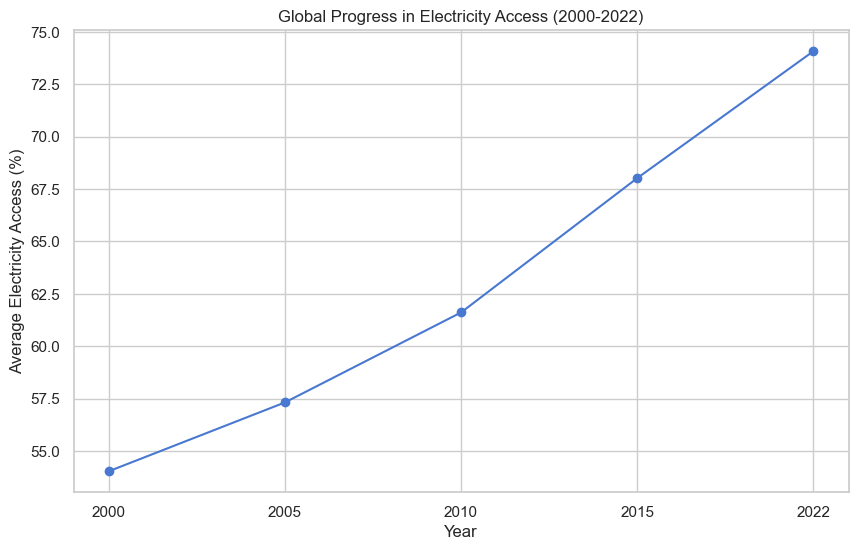

In [49]:
import matplotlib.pyplot as plt

# Aggregate global data for electricity access over the years
global_access_years = ['Access_2000', 'Access_2005', 'Access_2010', 'Access_2015', 'Access_2022']
global_access_data = combined_access_df_corrected[global_access_years].mean()

# Plotting the global progress in electricity access
plt.figure(figsize=(10, 6))
global_access_data.plot(kind='line', marker='o')
plt.title('Global Progress in Electricity Access (2000-2022)')
plt.xlabel('Year')
plt.ylabel('Average Electricity Access (%)')
plt.grid(True)
plt.xticks(ticks=range(len(global_access_years)), labels=[year.split('_')[1] for year in global_access_years])
plt.show()

In [51]:
import pandas as pd

# Function to transform the dataset
def transform_dataset(csv_file_path):
    # Load the CSV file
    data = pd.read_csv(csv_file_path)
    
    # Remove rows with NaN in 'Entity' or 'Year'
    data_cleaned = data.dropna(subset=['Entity', 'Year'])
    
    # Pivot the table: Each metric for each year will become a separate column
    data_wide = data_cleaned.pivot(index='Entity', columns='Year').reset_index()
    
    # Flatten the MultiIndex columns
    data_wide.columns = ['{}_{}'.format(str(col[0]), str(int(col[1])) if col[0] != 'Entity' else col[0]) for col in data_wide.columns.values]
    
    # Replace any remaining NaN values with zeros (can be adjusted as needed)
    data_wide.fillna(0, inplace=True)
    
    return data_wide

# Apply the transformation function to the dataset
csv_file_path = 'cleanedData_Goal7.csv'
transformed_data = transform_dataset(csv_file_path)

# Export the transformed data to a new CSV file
transformed_csv_file_path = 'Goal7_Transformed.csv'
transformed_data.to_csv(transformed_csv_file_path, index=False)

print(f"Transformed data saved to {transformed_csv_file_path}")


Transformed data saved to Goal7_Transformed.csv


In [52]:
transformed_data.head()

,Entity_Entity,Access to electricity (% of population)_2000,Access to electricity (% of population)_2001,Access to electricity (% of population)_2002,Access to electricity (% of population)_2003,Access to electricity (% of population)_2004,Access to electricity (% of population)_2005,Access to electricity (% of population)_2006,Access to electricity (% of population)_2007,Access to electricity (% of population)_2008,...,Longitude_2011,Longitude_2012,Longitude_2013,Longitude_2014,Longitude_2015,Longitude_2016,Longitude_2017,Longitude_2018,Longitude_2019,Longitude_2020
0,Afghanistan,1.613591,4.074574,9.409158,14.738506,20.064968,25.390894,30.718690,36.051010,42.40,...,67.709953,67.709953,67.709953,67.709953,67.709953,67.709953,67.709953,67.709953,67.709953,67.709953
1,Albania,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00,...,20.168331,20.168331,20.168331,20.168331,20.168331,20.168331,20.168331,20.168331,20.168331,20.168331
2,Algeria,98.973100,98.966870,98.953060,98.934010,98.912080,98.889610,98.869010,98.852936,99.30,...,1.659626,1.659626,1.659626,1.659626,1.659626,1.659626,1.659626,1.659626,1.659626,1.659626
3,Angola,24.212744,20.000000,26.352118,27.412777,28.470550,29.527786,30.586895,37.500000,38.49,...,17.873887,17.873887,17.873887,17.873887,17.873887,17.873887,17.873887,17.873887,17.873887,17.873887
4,Antigua and Barbuda,97.689260,97.785255,100.000000,97.956825,98.037100,92.200000,100.000000,100.000000,100.00,...,-61.796428,-61.796428,-61.796428,-61.796428,-61.796428,-61.796428,-61.796428,-61.796428,-61.796428,-61.796428


In [54]:
energy_investments = pd.read_excel("Final_Data.xlsx", sheet_name=1)

energy_investments_info = energy_investments.info()
energy_investments_head = energy_investments.head()

energy_investments_info, energy_investments_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Category   243 non-null    object 
 1   2015       243 non-null    float64
 2   2016       243 non-null    float64
 3   2017       243 non-null    float64
 4   2018       243 non-null    float64
 5   2019       243 non-null    float64
 6   2020       243 non-null    float64
 7   2021       243 non-null    float64
 8   2022       243 non-null    float64
 9   2023       243 non-null    float64
 10  Continent  243 non-null    object 
dtypes: float64(9), object(2)
memory usage: 21.0+ KB


(None,
                     Category    2015    2016    2017    2018    2019    2020  \
 0      Total (billion $2022)  2392.0  2237.0  2243.0  2245.0  2291.0  2098.0   
 1     of which: Clean energy  1074.0  1132.0  1129.0  1137.0  1225.0  1259.0   
 2           Supply (by type)  2013.0  1826.0  1840.0  1850.0  1865.0  1683.0   
 3  Fossil fuels without CCUS  1319.0  1105.0  1115.0  1109.0  1066.0   839.0   
 4                 Renewables   337.0   346.0   357.0   383.0   458.0   500.0   
 
      2021    2022    2023 Continent  
 0  2322.0  2619.0  2791.0     World  
 1  1408.0  1617.0  1740.0     World  
 2  1804.0  2019.0  2166.0     World  
 3   915.0  1003.0  1051.0     World  
 4   525.0   608.0   672.0     World  )

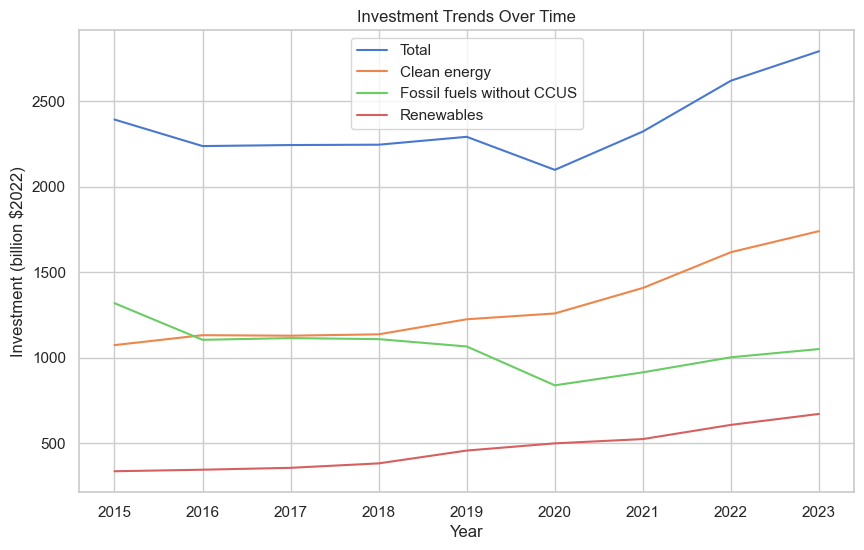

In [55]:
import matplotlib.pyplot as plt

# Setting the plot size for all plots
plt.rcParams['figure.figsize'] = [10, 6]

# Plotting investment trends
def plot_investment_trends(data, categories):
    years = data.columns[1:-1]  # Skipping the 'Category' and 'Continent' columns
    plt.figure()
    for cat in categories:
        subset = data[data['Category'].str.contains(cat)]
        if not subset.empty:
            plt.plot(years, subset.iloc[0, 1:-1], label=cat)  # -1 to skip 'Continent'

    plt.title('Investment Trends Over Time')
    plt.xlabel('Year')
    plt.ylabel('Investment (billion $2022)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
plot_investment_trends(energy_investments, ['Total', 'Clean energy', 'Fossil fuels without CCUS', 'Renewables'])
